### Exploring the data for better understanding of the problem.
"""
Author: vickyparmar
File: explore.ipynb
Created on: 09-09-2022, Fri, 15:15:59
"""
"""
Last modified by: vickyparmar
Last modified on: 09-9-2022, Fri, 15:16:55
"""

In [1]:
# Imports
from pathlib import Path
import pandas as pd
import holidays
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data path
data = Path("/Users/vickyparmar/data/kaggle")

In [3]:
# Train and Test data
train = pd.read_csv(data / "tabular-playground-series-sep-2022/train.csv")
test = pd.read_csv(data / "tabular-playground-series-sep-2022/test.csv")

In [4]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [ ]:
train.shape

In [ ]:
test.head()

In [ ]:
test.shape

In [ ]:
train.dtypes

In [ ]:
train['date'] = pd.to_datetime(train['date'])

In [ ]:
train.dtypes

In [ ]:
train.describe()

In [ ]:
train.isna().sum()

In [5]:
train.columns

Index(['row_id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [8]:
print(train.country.unique())
print(train.store.unique())
print(train["product"].unique())

['Belgium' 'France' 'Germany' 'Italy' 'Poland' 'Spain']
['KaggleMart' 'KaggleRama']
['Kaggle Advanced Techniques' 'Kaggle Getting Started'
 'Kaggle Recipe Book' 'Kaggle for Kids: One Smart Goose']


In [ ]:
# Getting the day of the week
def get_day(date):
    days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
    day_num = date.weekday()
    return days[day_num]

In [ ]:
get_day(train.iloc[0, 1])

In [ ]:
# Checking for weekends
def is_weekend(day):
    if day.lower() in ["saturday", "sunday"]:
        return 1
    return 0

In [ ]:
is_weekend("Sunday")

In [ ]:
# Checking for holidays
def is_holiday(row):
    if row["date"] in holidays.CountryHoliday(row["country"]):
        return 1
    return 0

In [ ]:
is_holiday(train.iloc[0, :])

In [ ]:
# Getting the season of the year
def get_season(date):
    if date.month in range(3, 6):
        return "Spring"
    elif date.month in range(6, 9):
        return "Summer"
    elif date.month in range(9, 12):
        return "Autumn"
    else:
        return "Winter"

In [ ]:
get_season(train.iloc[0, 1])

### Seasons according to Hemisphere
For a more robust model to be deployed across the globe, one should consider fine-tuning the seasons

In [ ]:
train["day"] = train["date"].apply(lambda dt: get_day(dt))
train["is_weekend"] = train["day"].apply(lambda d: is_weekend(d))
train["season"] = train["date"].apply(lambda dt: get_season(dt))
train["is_holiday"] = train.apply(lambda row: is_holiday(row), axis=1)

In [ ]:
train

In [ ]:
for col in ["country", "store", "product", "day", "is_weekend", "season", "is_holiday"]:
    print(f"{train[col].value_counts()}")
    print("-"*100)

In [ ]:
(train.date.max()-train.date.min())

In [ ]:
type(train.iloc[0, 1])

In [ ]:
train

<AxesSubplot:xlabel='date', ylabel='num_sold'>

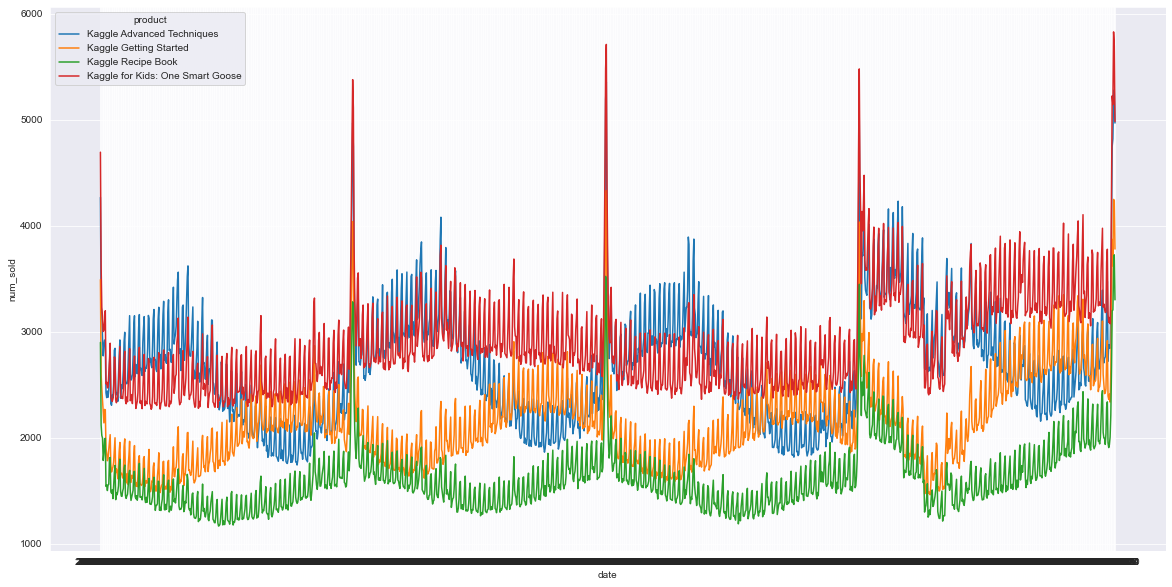

In [9]:
product_df = train.groupby(["date", "product"])["num_sold"].sum().reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=product_df, x="date", y="num_sold", hue="product")

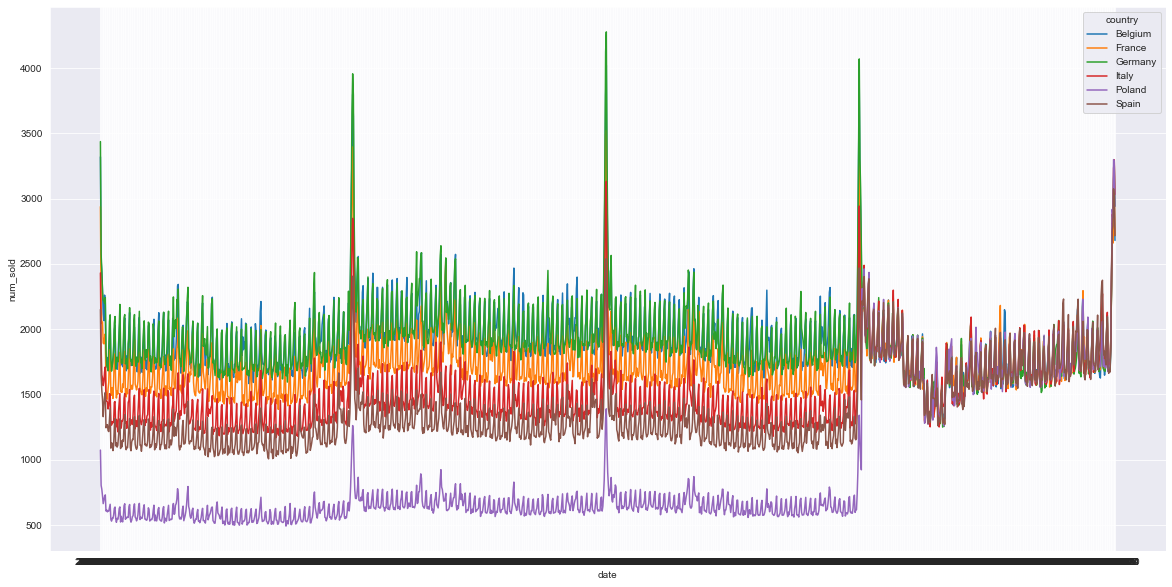

In [10]:
product_df = train.groupby(["date","country"])["num_sold"].sum().reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=product_df, x="date", y="num_sold", hue="country");